# 나이브베이즈 분류
* 베이즈 이론 (베이지안 확률)
  * A가 일어났을 때 B가 일어날 확률
  * 메일 제목에 "무료"라는 단어가 있을 때 스팸매일 일 확률
  * 주관적으로 확률을 해석
  * 데이터를 통해서 확률을 추정할 때 현재 관측된 데이터의 빈도만으로 분석하는 것이 아니라 분석자의 사전지식(혹은 알려진 사진, 분석자의 주관)까지 포함해서 분석하는 방법
  * 베이즈 정리에서 확률은 '주장' 혹은 '믿음의 신뢰도'로 나타난다.
* 나이브베이즈 분류모델은 베이즈 정리를 기반으로 한 지도학습 모델로, 스팸메일 필터링, 텍스트 분류 등에 사용된다.   
* 나이브 베이즈는 데이터의 모든 특성 변수가 서로 동등하고 독립적이라는 가정하에 분류를 실행한다.
* 독립변수의 특성들은 나이브 베이즈 분류기에서 서로 연관성이 없고, 각각의 특성이 독립적으로 기여하는 것으로 간주한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv")

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [6]:
data.isna().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [13]:
data.groupby('Clicked on Ad')['Age'].value_counts()

Clicked on Ad  Age 
0              31.0    40
               28.0    34
               26.0    29
               29.0    26
               27.0    26
                       ..
1              56.0     2
               19.0     1
               20.0     1
               22.0     1
               61.0     1
Name: count, Length: 76, dtype: int64

In [14]:
data.groupby('Age')['Clicked on Ad'].value_counts()

Age   Clicked on Ad
19.0  0                5
      1                1
20.0  0                5
      1                1
21.0  0                5
                      ..
57.0  1                6
58.0  1                4
59.0  1                2
60.0  1                4
61.0  1                1
Name: count, Length: 76, dtype: int64

In [15]:
data[data['Age'].isna() == False] # null값이 아닌 애들만 불러오기.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [16]:
data2 = data[data['Age'].isna() == False]

In [18]:
data2['Age'].describe()

count    916.000000
mean      36.128821
std        9.018548
min       19.000000
25%       29.000000
50%       35.000000
75%       42.000000
max       61.000000
Name: Age, dtype: float64

In [20]:
def ages(x):
    if x < 20:
        return '10s'
    elif 20 <= x <30:
        return '20s'
    elif 30 <= x <40:
        return '30s'
    elif 40 <= x <50:
        return '40s'
    elif 50 <= x <60:
        return '50s'
    elif 60 <= x <70:
        return '60s'

In [21]:
data2['Age'] = data2['Age'].apply(ages)

C:\Users\hi\AppData\Local\Temp\ipykernel_8656\3509914117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Age'] = data2['Age'].apply(ages)


In [22]:
data2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,30s,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,20s,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,20s,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,30s,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,20s,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0


In [23]:
data2.groupby('Age')['Clicked on Ad'].value_counts(sort=False)

Age  Clicked on Ad
10s  0                  5
     1                  1
20s  0                183
     1                 61
30s  0                211
     1                143
40s  0                 51
     1                169
50s  0                  4
     1                 83
60s  1                  5
Name: count, dtype: int64

In [24]:
data2.loc[data2['Age'] == '50s', 'Ad Topic Line']

22           Mandatory disintermediate utilization
27                  Monitored systematic hierarchy
32                     Digitized global capability
34             Synchronized dedicated service-desk
36                         Profound stable product
                          ...                     
965                       Intuitive global website
966    Exclusive disintermediate Internet solution
972                   Switchable real-time product
980          Focused incremental Graphic Interface
997                   Expanded intangible solution
Name: Ad Topic Line, Length: 87, dtype: object

In [31]:
data.loc[(data['Age'].isna()==True) & (data['Clicked on Ad'] == 1 )]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
18,54.70,NaN,31087.54,118.39,Grass-roots solution-oriented conglomeration,Jessicastad,1,British Indian Ocean Territory (Chagos Archipe...,2/13/2016 7:53,1
56,65.19,NaN,75254.88,150.61,Cross-group regional website,Garciaside,0,Israel,2/17/2016 11:42,1
96,45.72,NaN,22473.08,154.02,Versatile homogeneous capacity,Williammouth,1,Hong Kong,4/19/2016 15:14,1
156,44.64,NaN,55787.58,127.01,Up-sized incremental encryption,Codyburgh,0,Belize,2/14/2016 6:51,1
189,39.86,NaN,32593.59,145.85,Total 5thgeneration standardization,Josephstad,0,Algeria,6/26/2016 17:16,1
219,43.60,NaN,20856.54,170.49,Virtual bandwidth-monitored initiative,North Ricardotown,0,Chile,1/11/2016 7:36,1
231,46.77,NaN,31092.93,136.40,Multi-tiered maximized archive,Reneechester,1,Serbia,3/23/2016 6:00,1
232,62.42,NaN,74445.18,143.94,Diverse executive groupware,West Tinashire,0,Saint Pierre and Miquelon,7/19/2016 7:59,1
282,40.67,NaN,48913.07,133.18,Stand-alone encompassing throughput,West Amanda,0,Lebanon,5/5/2016 9:28,1
302,39.25,NaN,62378.05,152.36,Customer-focused incremental system engine,Michellefort,0,Mayotte,1/23/2016 17:39,1


In [32]:
data['Age'] = data2['Age']

In [33]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,30s,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,20s,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,20s,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,30s,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [34]:
data.loc[(data['Age'].isna()==True) & (data['Clicked on Ad'] == 0 ),'Age'] = '10s'

In [35]:
data.loc[(data['Age'].isna()==True) & (data['Clicked on Ad'] == 1 ),'Age'] = '50s'

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [37]:
data.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,55000.000080,180.000100,0.481000,0.50000
std,15.853615,13414.634022,43.902339,0.499889,0.50025
min,32.600000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,65470.635000,218.792500,1.000000,1.00000
max,91.430000,79484.800000,269.960000,1.000000,1.00000


<Axes: >

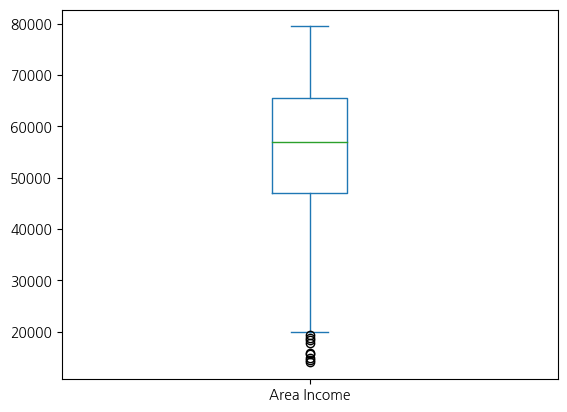

In [44]:
data['Area Income'].plot(kind='box')

<Axes: xlabel='Age'>

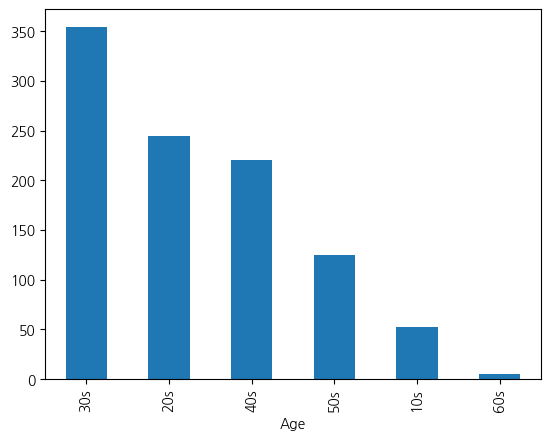

In [49]:
data['Age'].value_counts().plot(kind='bar') # 문자열일경우에는 그래프가 안 보이니까 value_count()로 한 후에 그림을 그려야 해.

<Axes: xlabel='Male'>

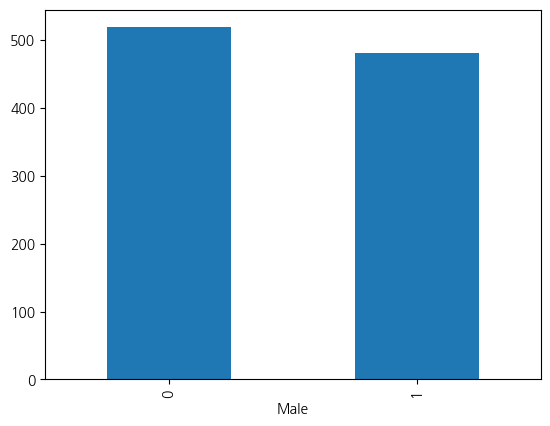

In [50]:
data['Male'].value_counts().plot(kind='bar')

In [57]:
data['City'].nunique()

969

<Axes: xlabel='Clicked on Ad'>

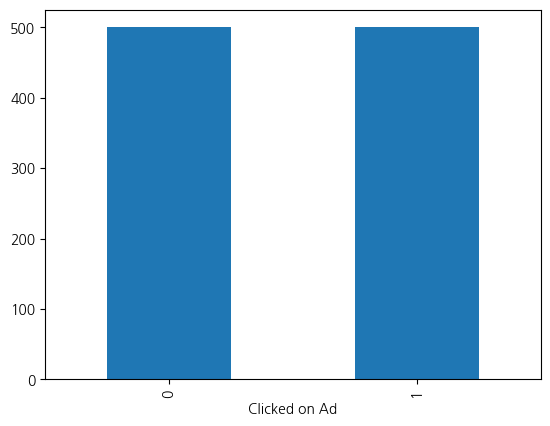

In [54]:
data['Clicked on Ad'].value_counts().plot(kind='bar')

C:\Users\hi\AppData\Local\Temp\ipykernel_8656\3495980226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area Income'])


<Axes: xlabel='Area Income', ylabel='Density'>

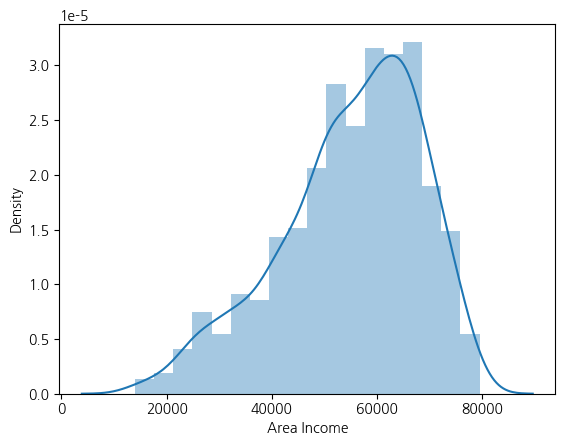

In [55]:
sns.distplot(data['Area Income'])

In [56]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [60]:
X = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis=1)
y = data['Clicked on Ad']

In [61]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,10s,61833.90,256.09,0
1,80.23,30s,68441.85,193.77,1
2,69.47,20s,59785.94,236.50,0
3,74.15,20s,54806.18,245.89,1
4,68.37,30s,73889.99,225.58,0


In [64]:
X= pd.get_dummies(X, drop_first=True)
X

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s
0,68.95,61833.90,256.09,0,False,False,False,False,False
1,80.23,68441.85,193.77,1,False,True,False,False,False
2,69.47,59785.94,236.50,0,True,False,False,False,False
3,74.15,54806.18,245.89,1,True,False,False,False,False
4,68.37,73889.99,225.58,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,1,False,True,False,False,False
996,51.30,67782.17,134.42,1,False,False,True,False,False
997,51.63,42415.72,120.37,1,False,False,False,True,False
998,55.55,41920.79,187.95,0,False,False,False,False,False


In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # 다시 데이터프레임으로 만들기.
X_scaled.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s
0,0.249267,0.509691,1.734030,-0.962695,-0.568112,-0.740262,-0.531085,-0.377964,-0.070888
1,0.961132,1.002530,0.313805,1.038750,-0.568112,1.350873,-0.531085,-0.377964,-0.070888
2,0.282083,0.356949,1.287589,-0.962695,1.760216,-0.740262,-0.531085,-0.377964,-0.070888
3,0.577432,-0.014456,1.501580,1.038750,1.760216,-0.740262,-0.531085,-0.377964,-0.070888
4,0.212664,1.408868,1.038731,-0.962695,-0.568112,1.350873,-0.531085,-0.377964,-0.070888


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

# 나이브베이즈 예측 및 평가

In [73]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

In [74]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
pred = nbc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.83
              precision    recall  f1-score   support

           0       0.74      0.99      0.85        97
           1       0.99      0.68      0.80       103

    accuracy                           0.83       200
   macro avg       0.87      0.83      0.83       200
weighted avg       0.87      0.83      0.83       200



In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.95
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        97
           1       0.96      0.94      0.95       103

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [80]:
rfc = RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=7)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.965
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        97
           1       0.96      0.97      0.97       103

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.965
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        97
           1       0.95      0.98      0.97       103

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



한국어 분석을 하기 위해서 구글에서 konlpy를 검색해서 공부해봐.